# Homework 5
You need to classify digits with SVM models in this homework. Use PCA to reduce data dimensionality (80% information remain). Compare performance of linear, radial, and polynomial kernals. Tune kernal parameters using Randomsearch method.

Linear SVC Accuracy
0.9622222222222222
Best Parameters
{'svc__C': 7.593914594988132}

Radial SVC Accuracy
0.9777777777777777
Best Parameters
{'svc__C': 4.232045079327033, 'svc__gamma': 0.0005979394478646771}

Polynomial SVC Accuracy
0.9777777777777777
Best Parameters
{'svc__C': 8.101664798982963}



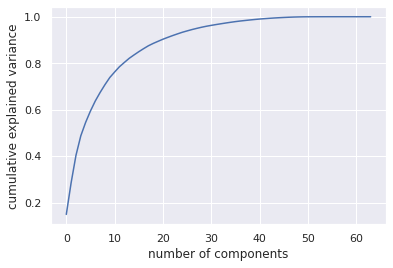

In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
from sklearn import datasets, svm, metrics
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# The digits dataset
digits = datasets.load_digits()

def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
#plot_digits(digits.data)

pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Return the cumulative sum of the elements along a given axis.
a = np.array([[1,2,3], [4,5,6]])
np.cumsum(a)

Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,
                                                random_state=1)


#LINEAR
linSVM = svm.SVC(kernel='linear')
pca = PCA(13)
linModel = make_pipeline(pca, linSVM)

SVCParameters = {'svc__C': stats.uniform(0.1, 10)}

tuneLinModel = RandomizedSearchCV(linModel, SVCParameters, cv=5)

tuneLinModel.fit(Xtrain, ytrain)

predicted = tuneLinModel.predict(Xtest)

print('Linear SVC Accuracy')
print(metrics.accuracy_score(ytest,predicted))
print("Best Parameters")
print(tuneLinModel.best_params_)
print()

#RADIAL
radSVM = svm.SVC(kernel='rbf')
radModel = make_pipeline(pca, radSVM)

radParameters = {'svc__C': stats.uniform(0.1, 10),
                 'svc__gamma': stats.uniform(0.0001, 0.01)}

tuneRadModel = RandomizedSearchCV(radModel, radParameters, cv=5)

tuneRadModel.fit(Xtrain, ytrain)

predicted = tuneRadModel.predict(Xtest)

print('Radial SVC Accuracy')
print(metrics.accuracy_score(ytest,predicted))
print("Best Parameters")
print(tuneRadModel.best_params_)
print()

#POLYNOMIAL

polSVM= svm.SVC(kernel='poly')
polModel = make_pipeline(pca, polSVM)

polParameters = {'svc__C': stats.uniform(0.1, 10)}

tunePolModel = RandomizedSearchCV(polModel, polParameters, cv=5)

tunePolModel.fit(Xtrain, ytrain)

predicted = tunePolModel.predict(Xtest)

print('Polynomial SVC Accuracy')
print(metrics.accuracy_score(ytest,predicted))
print("Best Parameters")
print(tunePolModel.best_params_)
print()